In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv',parse_dates=['Date'])
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# Exploratory Data Analysis

In [3]:
data.shape

(1517, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
Unnamed: 0      1517 non-null int64
Date            1517 non-null datetime64[ns]
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 166.0+ KB


Statistical Summary

In [5]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [6]:
data.drop(['Unnamed: 0'],axis=True,inplace=True)#Dropping Unusual Column

In [7]:
nan=data.isnull().sum()
nan

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
#There is no nan Value within the dataset

In [9]:
data.type.value_counts()

conventional    1517
Name: type, dtype: int64

In [10]:
#As all the types are same i.e conventional, we can drop the type column
data.drop(['type'],axis=1,inplace=True)

In [11]:
data.region.value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [12]:
data.year.value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Encoded_region']=le.fit_transform(data['region'].values)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Encoded_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte,7


In [14]:
region_codes=data.iloc[:,[-2,-1]].drop_duplicates()
region_codes#It is for knowing region from there codes

,region,Encoded_region
0,Albany,0
52,Atlanta,1
91,BaltimoreWashington,2
132,Boise,3
157,Boston,4
175,BuffaloRochester,5
184,California,6
208,Charlotte,7
224,Chicago,8
247,Columbus,9


In [15]:
data.drop(['region'],axis=1,inplace=True)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


Checking for Correlation

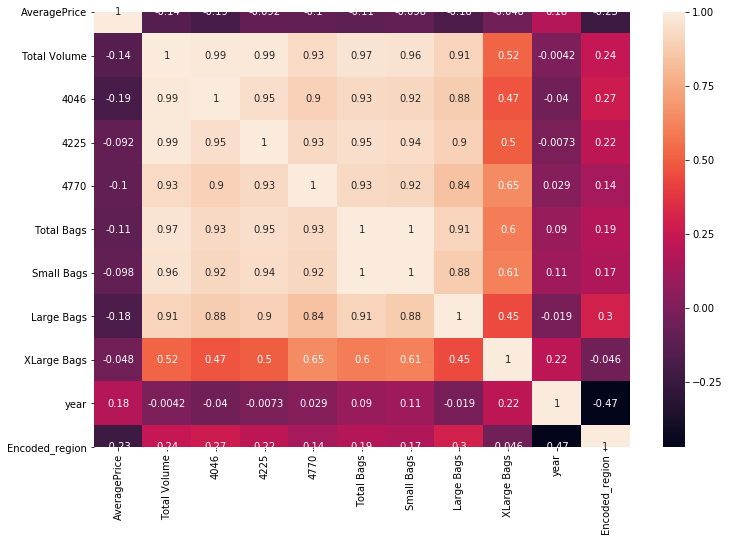

In [16]:
cor=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True)

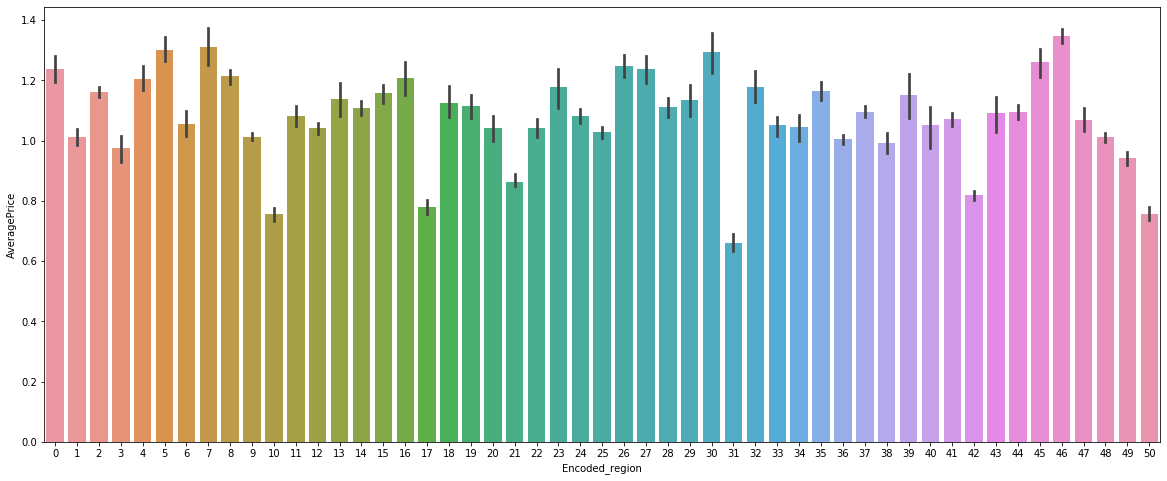

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(y='AveragePrice',x='Encoded_region',data=data)

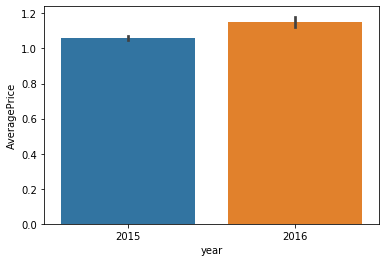

In [18]:
sns.barplot(x='year',y='AveragePrice',data=data)

In [19]:
#monthwise average value

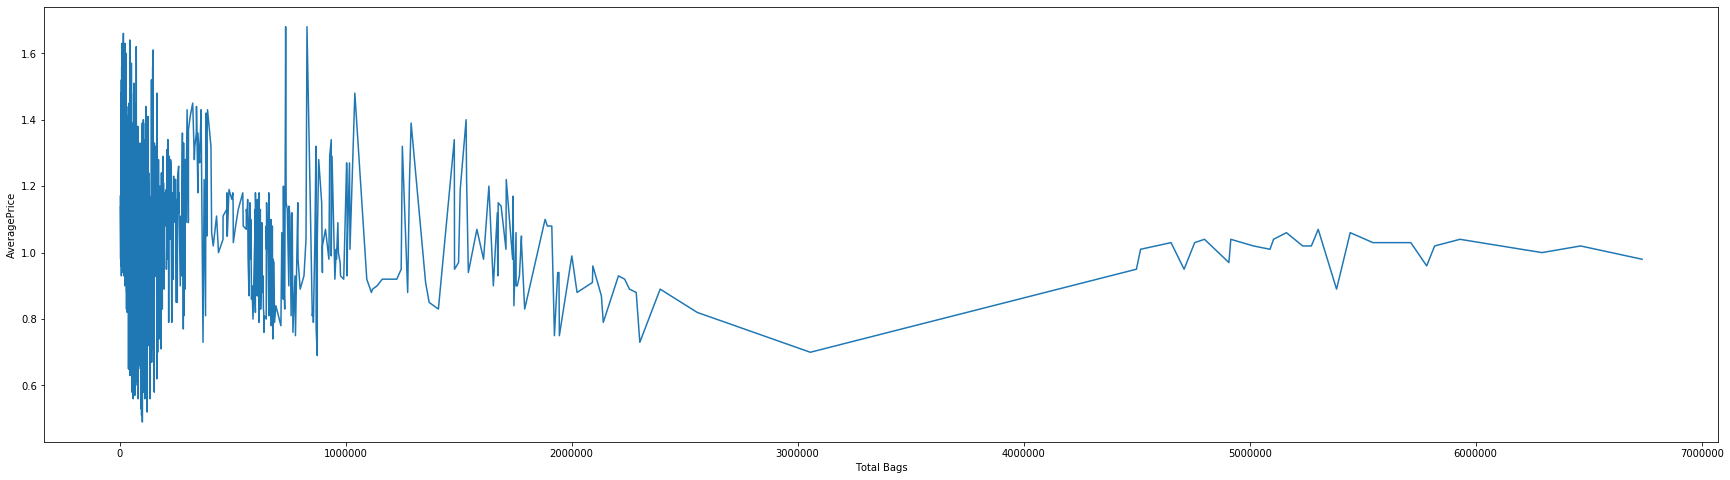

In [20]:
plt.figure(figsize=(30,8))
sns.lineplot(x='Total Bags',y='AveragePrice',data=data)

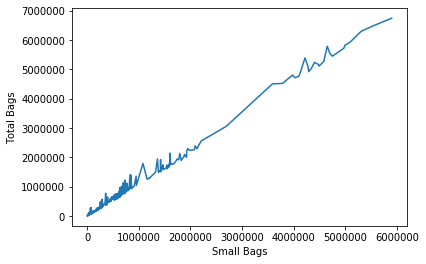

In [21]:
sns.lineplot(x='Small Bags',y='Total Bags',data=data)

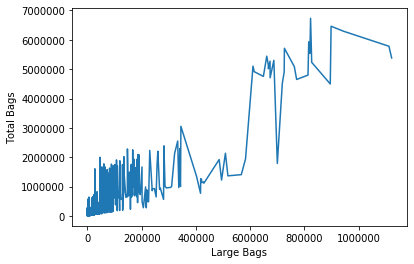

In [22]:
sns.lineplot(x='Large Bags',y='Total Bags',data=data)

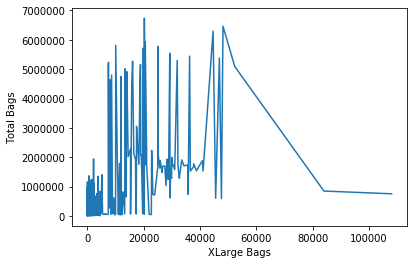

In [23]:
sns.lineplot(x='XLarge Bags',y='Total Bags',data=data)

In [24]:
Year_2015=data.loc[data['year']==2015]
Year_2016=data.loc[data['year']==2016]
Year_2015

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1265,2015-01-02,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.0,2015,50
1266,2015-01-25,0.80,720800.61,519142.82,124248.86,10573.29,66835.64,65072.69,1762.95,0.0,2015,50
1267,2015-01-18,0.80,729795.72,516446.41,128438.87,12473.14,72437.30,71564.22,873.08,0.0,2015,50
1268,2015-11-01,0.92,584896.99,347125.63,129717.42,27944.07,80109.87,78503.46,1606.41,0.0,2015,50


In [25]:
Year_2016

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
1270,2016-12-25,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,2.94,2016,0
1271,2016-12-18,1.53,68938.53,3345.36,55949.79,138.72,9504.66,8876.65,587.73,40.28,2016,0
1272,2016-11-12,1.49,71777.85,2323.39,56545.79,86.65,12822.02,12176.75,645.27,0.00,2016,0
1273,2016-04-12,1.48,113031.96,6530.78,99746.05,50.84,6704.29,6476.12,228.17,0.00,2016,0
1274,2016-11-27,1.52,58171.89,2793.99,47106.18,18.14,8253.58,7973.98,279.60,0.00,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [26]:
#From date_2015 and date_2016 we can get monthly Average price of 2015 and 2016 respectively
date_2015=pd.DataFrame()
date_2015['month']=Year_2015.Date.dt.month_name()
date_2015['year']=Year_2015.Date.dt.year
date_2015['AveragePrice']=Year_2015.AveragePrice
date_2015

,month,year,AveragePrice
0,December,2015,1.33
1,December,2015,1.35
2,December,2015,0.93
3,June,2015,1.08
4,November,2015,1.28
...,...,...,...
1265,January,2015,0.71
1266,January,2015,0.80
1267,January,2015,0.80
1268,November,2015,0.92


In [27]:
date_2016=pd.DataFrame()
date_2016['month']=Year_2016.Date.dt.month_name()
date_2016['year']=Year_2016.Date.dt.year
date_2016['AveragePrice']=Year_2016.AveragePrice
date_2016

,month,year,AveragePrice
1270,December,2016,1.52
1271,December,2016,1.53
1272,November,2016,1.49
1273,April,2016,1.48
1274,November,2016,1.52
...,...,...,...
1512,October,2016,1.39
1513,September,2016,1.51
1514,February,2016,1.48
1515,September,2016,1.47


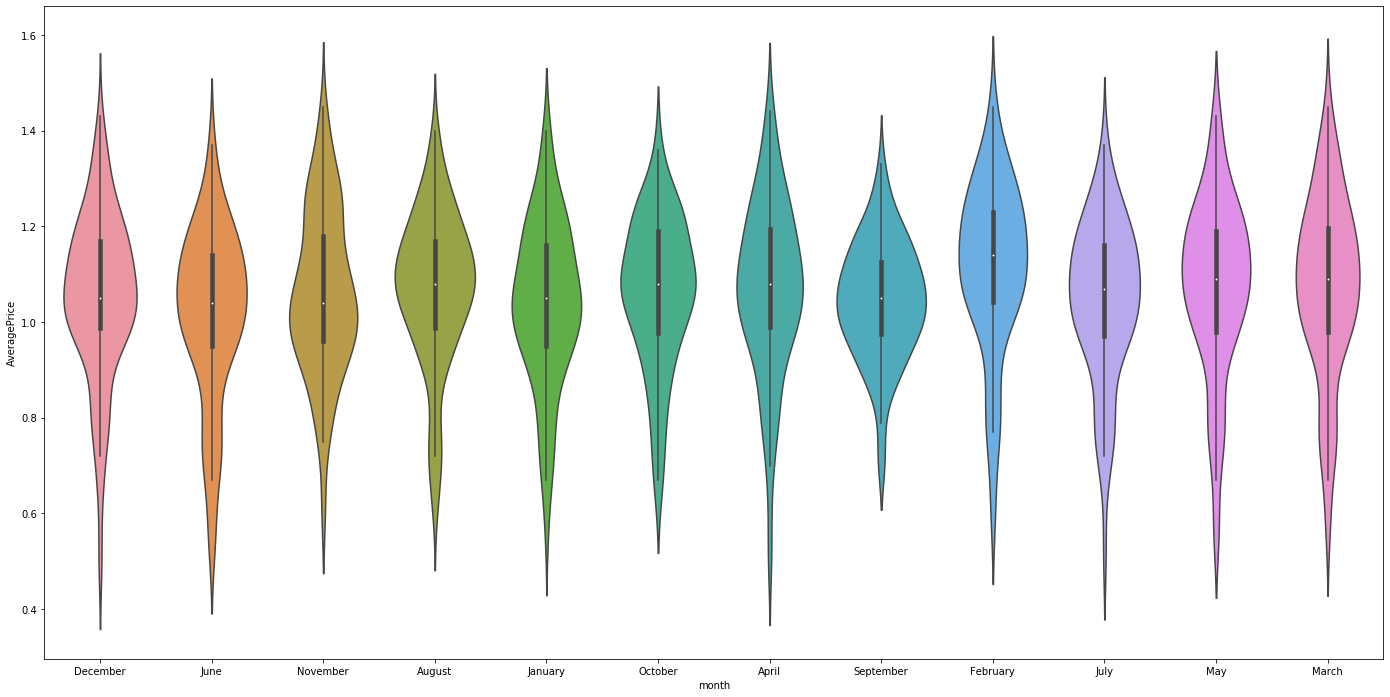

In [28]:
plt.figure(figsize=(24,12))
sns.violinplot(x=date_2015['month'],y=date_2015['AveragePrice'],data=date_2015)

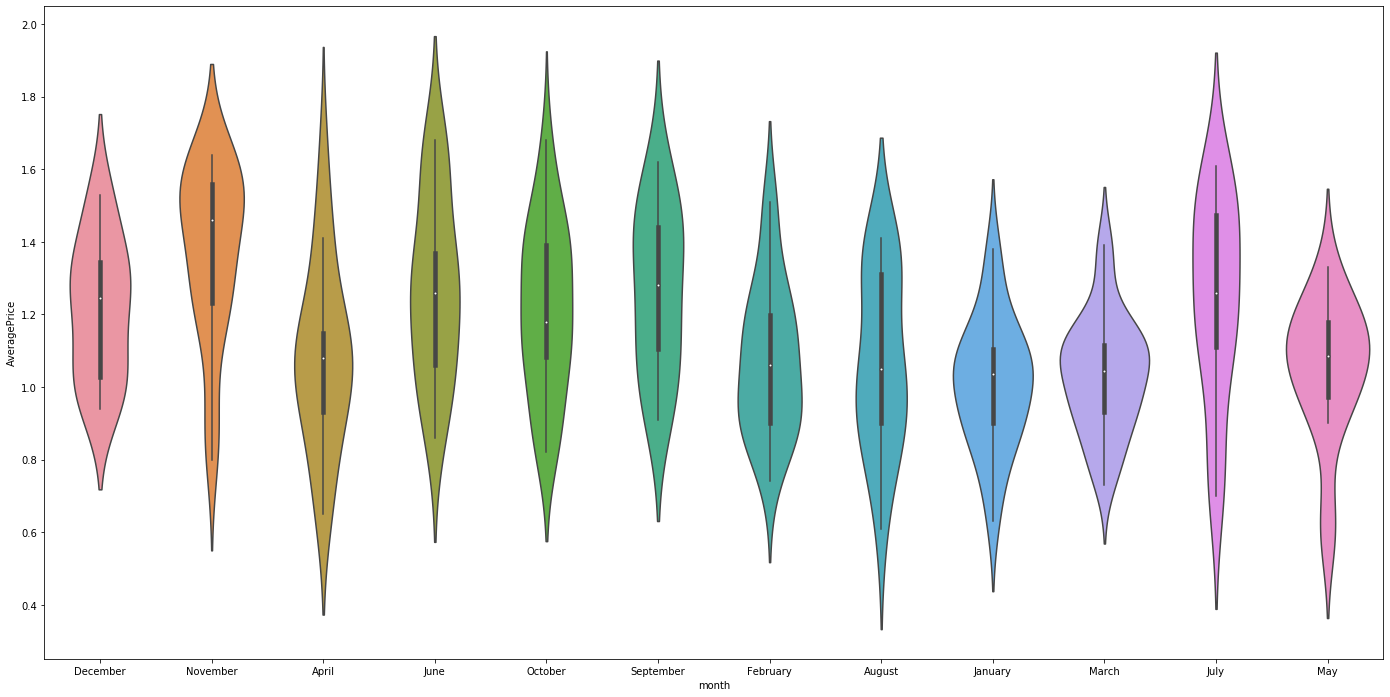

In [29]:
plt.figure(figsize=(24,12))
sns.violinplot(x=date_2016['month'],y=date_2016['AveragePrice'],data=date_2016)

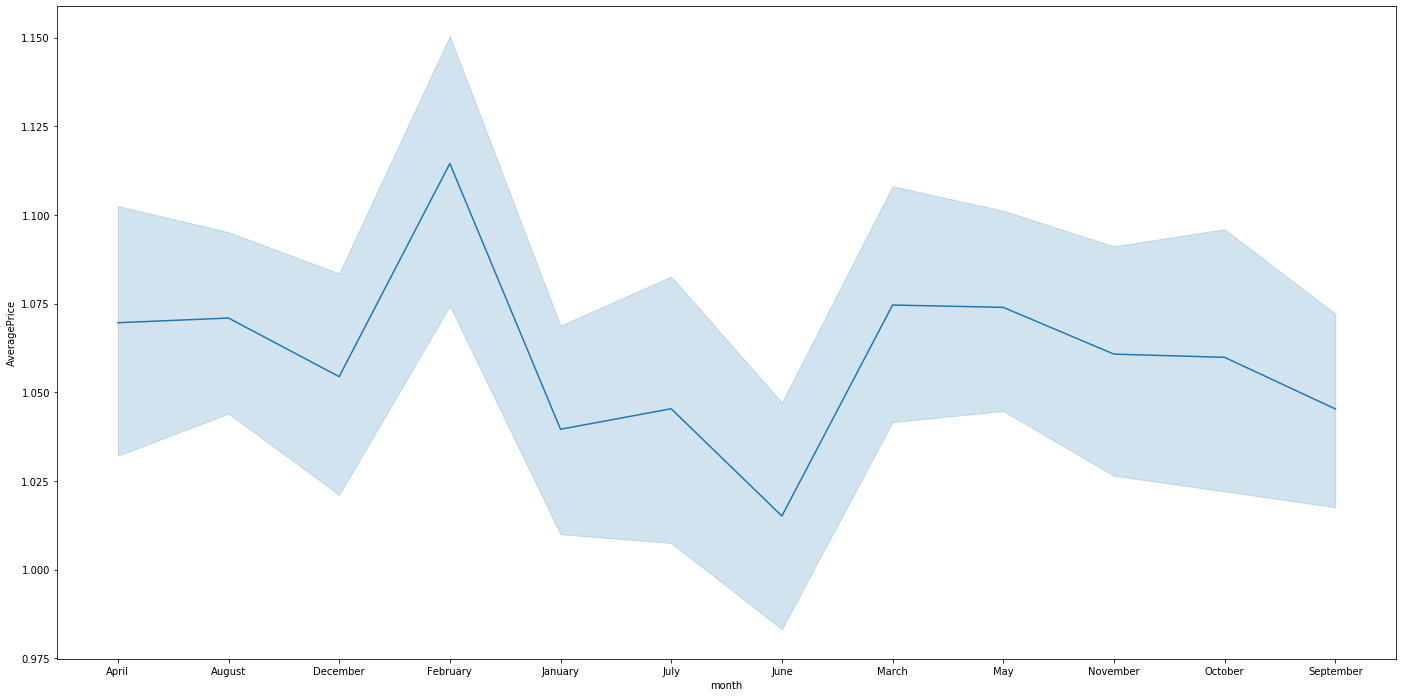

In [30]:
plt.figure(figsize=(24,12))
sns.lineplot(x=date_2015['month'],y=date_2015['AveragePrice'],data=date_2015)

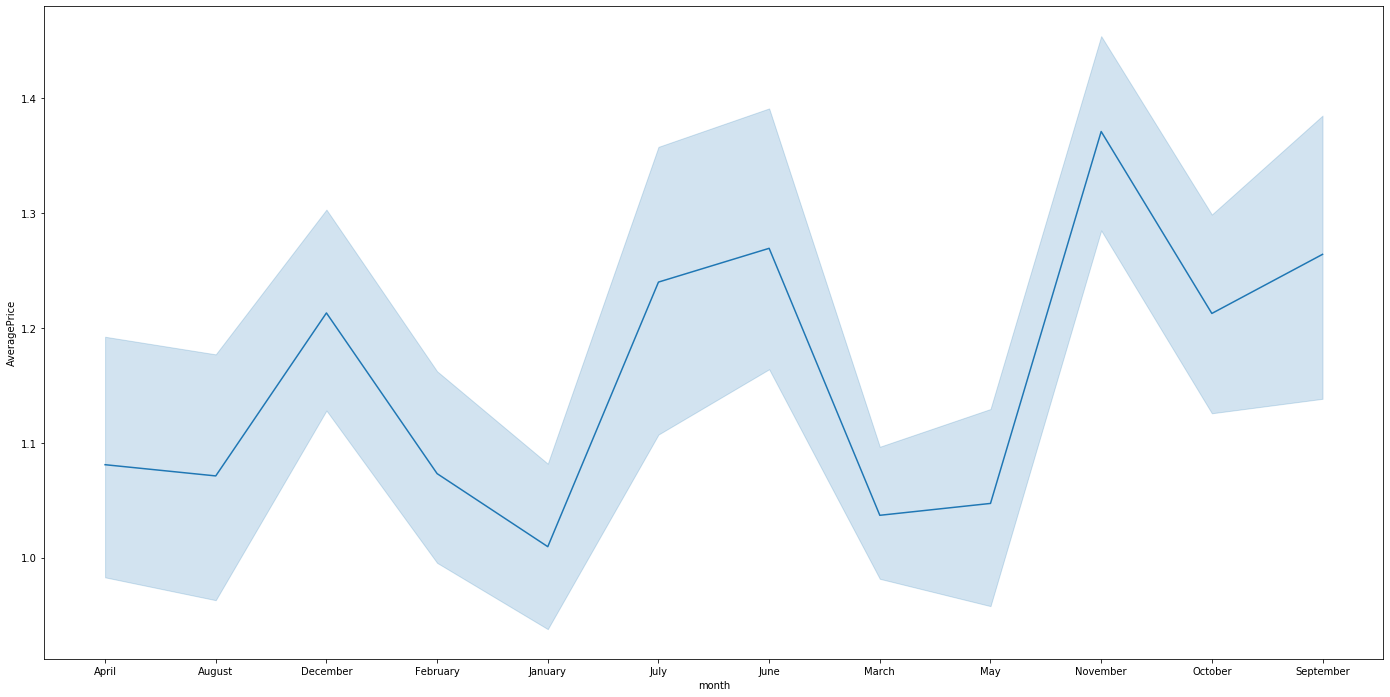

In [31]:
plt.figure(figsize=(24,12))
sns.lineplot(x=date_2016['month'],y=date_2016['AveragePrice'],data=date_2016)

In [32]:
Data=data.drop(['Date'],axis=1)
Data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


Checking for Outliers

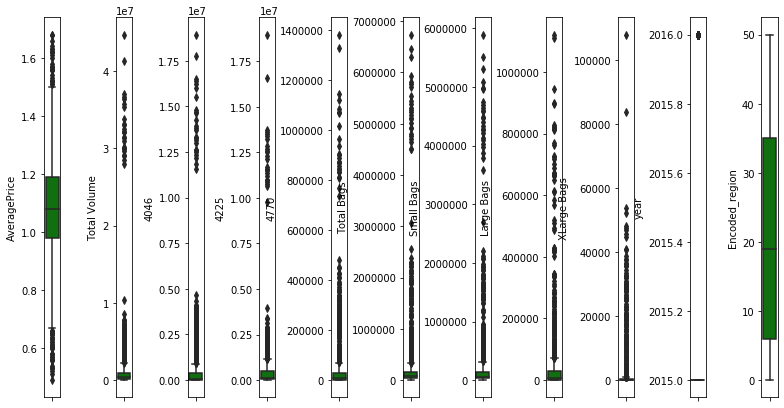

In [33]:
collist=Data.columns.values
ncols=11
nrows=10
plt.figure(figsize=(ncols,5*ncols))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(Data[collist[i]],orient='v',color='green')
    plt.tight_layout()

Cheking Skewness

In [34]:
Data.skew()

AveragePrice     -0.109444
Total Volume      6.200138
4046              6.051830
4225              6.394926
4770              5.405164
Total Bags        5.366378
Small Bags        5.355185
Large Bags        5.144495
XLarge Bags       5.775077
year              1.828332
Encoded_region    0.288146
dtype: float64

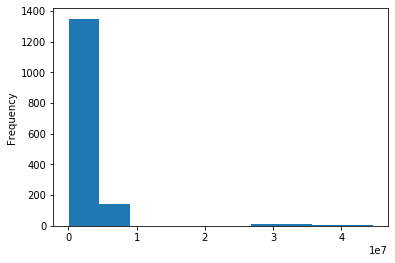

In [35]:
Data['Total Volume'].plot.hist()

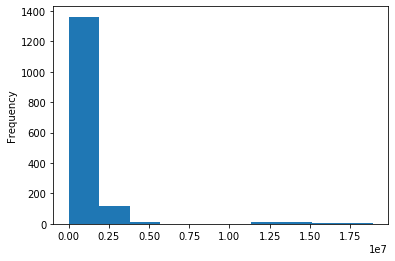

In [36]:
Data['4046'].plot.hist()

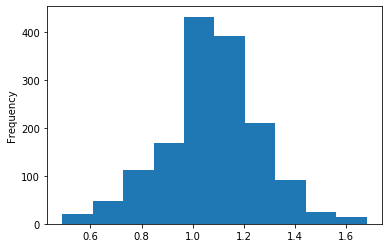

In [37]:
Data['AveragePrice'].plot.hist()

In [38]:
#Removing The outliers
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 2.26753179,
        0.88028586],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 2.26753179,
        0.88028586],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 2.26753179,
        0.88028586]])

In [39]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [40]:
print(Data.shape)
print(Data_new.shape)

(1517, 11)
(1436, 11)


In [41]:
#Making The Distribution Normal
cols=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in cols:
    Data_new[i]=np.sqrt(Data_new[i])

In [42]:
Data_new.skew()

AveragePrice     -0.184770
Total Volume      1.784245
4046              1.882842
4225              1.380059
4770              1.773953
Total Bags        2.166782
Small Bags        2.179872
Large Bags        1.696494
XLarge Bags       2.826879
year              2.004439
Encoded_region    0.276276
dtype: float64

In [43]:
cols=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in cols:
    Data_new[i]=np.sqrt(Data_new[i])

In [44]:
Data_new.skew()

AveragePrice     -0.184770
Total Volume      1.135526
4046              0.875523
4225              0.763938
4770              0.696428
Total Bags        1.273725
Small Bags        1.264007
Large Bags        0.442490
XLarge Bags       1.369467
year              2.004439
Encoded_region    0.276276
dtype: float64

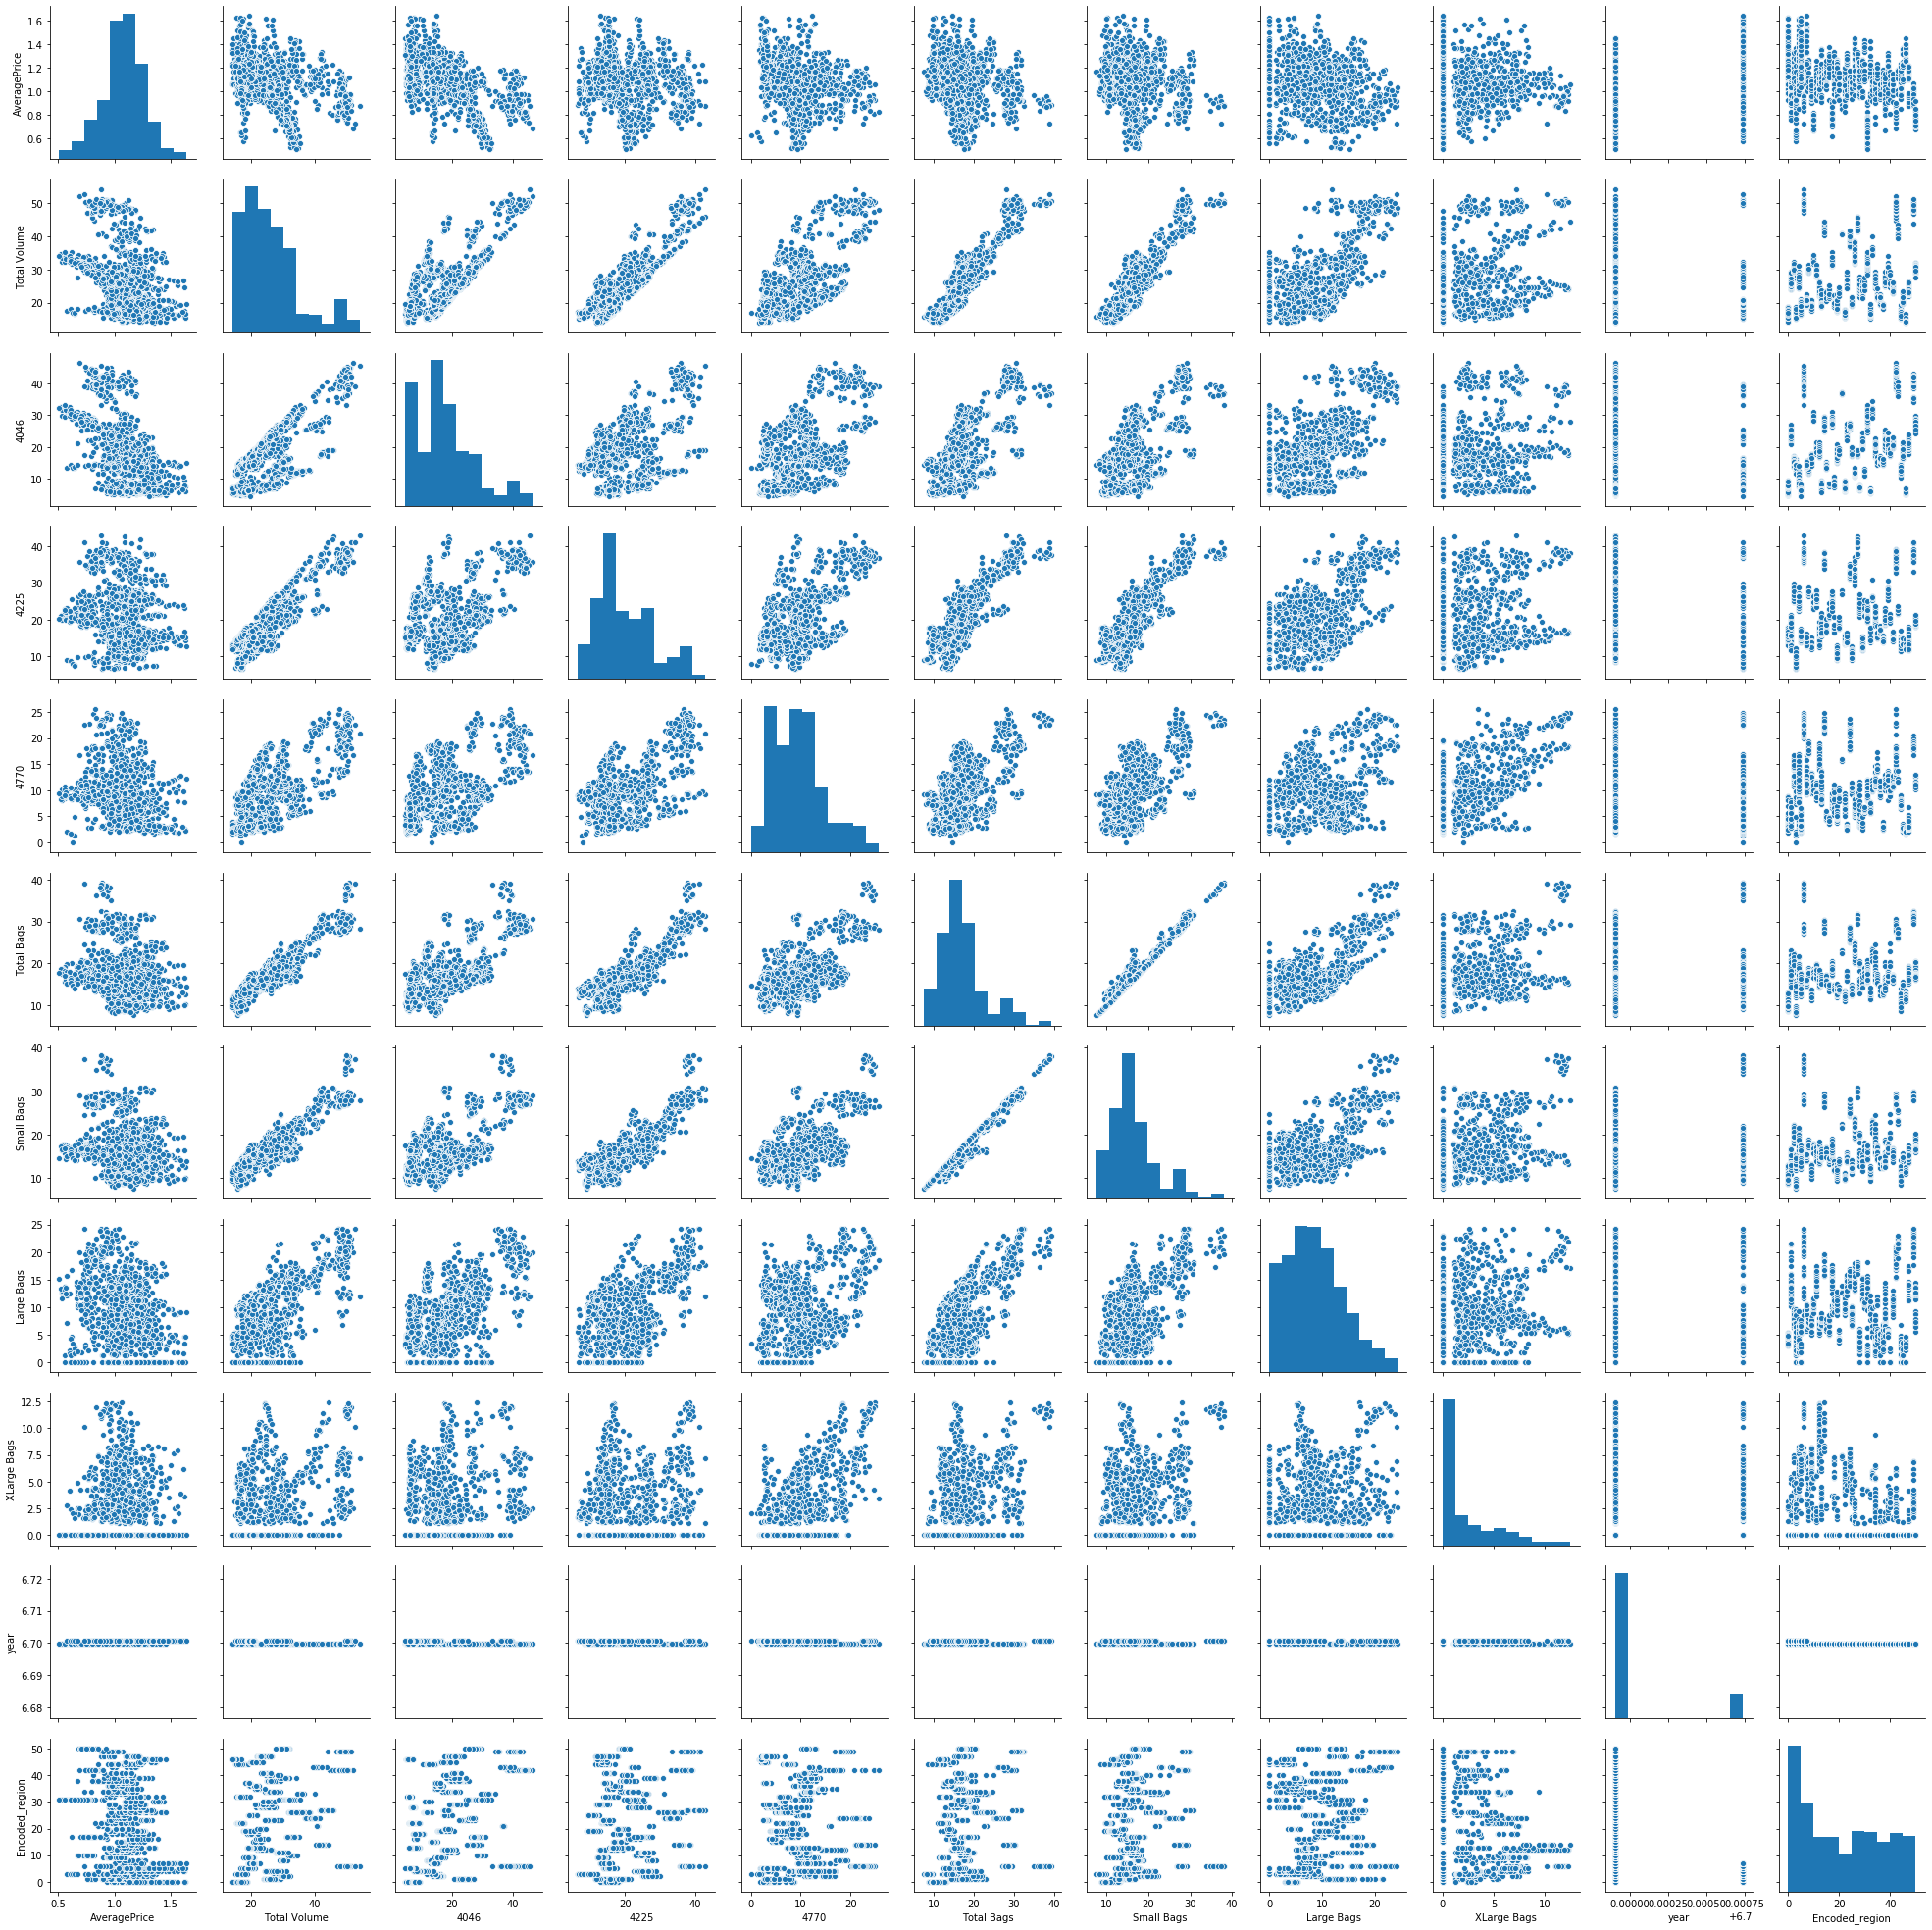

In [45]:
sns.pairplot(Data_new)

In [46]:
Data_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
0,1.33,15.920096,5.674368,15.275982,2.634339,9.656967,9.630976,3.107508,0.000000,6.699907,0
1,1.35,15.305501,5.095773,14.535439,2.763586,9.874030,9.848614,3.142245,0.000000,6.699907,0
2,0.93,18.542699,5.309466,18.176305,3.379890,9.500084,9.469866,3.186814,0.000000,6.699907,0
3,1.08,16.764708,5.800449,16.379383,2.918799,8.731035,8.680353,3.400804,0.000000,6.699907,0
4,1.28,15.030617,5.539273,14.469837,2.950453,8.867812,8.796074,3.749697,0.000000,6.699907,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,20.901178,15.487165,15.408330,11.506851,15.612784,14.864739,10.087507,3.937127,6.700738,7
1513,1.51,20.547013,14.427358,15.114578,11.804834,15.861788,15.293435,9.629000,0.000000,6.700738,7
1514,1.48,20.552057,14.673948,15.165276,11.374148,15.806058,15.196662,9.532808,5.359367,6.700738,7
1515,1.47,20.854077,15.251795,15.215218,11.500881,15.901171,15.359358,9.538603,0.000000,6.700738,7


In [47]:
df_x=Data_new.iloc[:,1:-1]
df_x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,15.920096,5.674368,15.275982,2.634339,9.656967,9.630976,3.107508,0.000000,6.699907
1,15.305501,5.095773,14.535439,2.763586,9.874030,9.848614,3.142245,0.000000,6.699907
2,18.542699,5.309466,18.176305,3.379890,9.500084,9.469866,3.186814,0.000000,6.699907
3,16.764708,5.800449,16.379383,2.918799,8.731035,8.680353,3.400804,0.000000,6.699907
4,15.030617,5.539273,14.469837,2.950453,8.867812,8.796074,3.749697,0.000000,6.699907
...,...,...,...,...,...,...,...,...,...
1512,20.901178,15.487165,15.408330,11.506851,15.612784,14.864739,10.087507,3.937127,6.700738
1513,20.547013,14.427358,15.114578,11.804834,15.861788,15.293435,9.629000,0.000000,6.700738
1514,20.552057,14.673948,15.165276,11.374148,15.806058,15.196662,9.532808,5.359367,6.700738
1515,20.854077,15.251795,15.215218,11.500881,15.901171,15.359358,9.538603,0.000000,6.700738


In [48]:
y=Data_new.iloc[:,0].values.reshape(-1,1)
y

array([[1.33],
       [1.35],
       [0.93],
       ...,
       [1.48],
       [1.47],
       [1.43]])

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.147152,-1.310965,-0.606992,-1.321983,-1.387313,-1.288266,-1.002564,-0.708549,-0.413870
1,-1.215874,-1.372256,-0.700307,-1.297124,-1.347734,-1.247406,-0.996237,-0.708549,-0.413870
2,-0.853899,-1.349619,-0.241526,-1.178584,-1.415919,-1.318513,-0.988120,-0.708549,-0.413870
3,-1.052709,-1.297610,-0.467954,-1.267270,-1.556145,-1.466738,-0.949143,-0.708549,-0.413870
4,-1.246611,-1.325276,-0.708573,-1.261182,-1.531205,-1.445012,-0.885596,-0.708549,-0.413870
...,...,...,...,...,...,...,...,...,...
1431,-0.590180,-0.271501,-0.590315,0.384557,-0.301345,-0.305669,0.268775,0.615521,2.416215
1432,-0.629782,-0.383765,-0.627330,0.441871,-0.255943,-0.225185,0.185262,-0.708549,2.416215
1433,-0.629218,-0.357644,-0.620942,0.359033,-0.266104,-0.243353,0.167742,1.093825,2.416215
1434,-0.595447,-0.296433,-0.614649,0.383409,-0.248762,-0.212809,0.168797,-0.708549,2.416215


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
max_r2_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred=lr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,' is ',max_r2_score )

max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  42  is  0.430240627785365
max r2 score corresponding to  54  is  0.44314672838492775
max r2 score corresponding to  54  is  0.44314672838492775
max r2 score corresponding to  54  is  0.44314672838492775
max r2 score corresponding to  54  is  0.44314672838492775
max r2 score corresponding to  54  is  0.44314672838492775
max r2 score correspo

In [51]:
#Using cross_val_score to check above is overfiiting or under fitting
a_score=cross_val_score(lr,x,y,cv=10,scoring="r2")
print(a_score)
print(np.mean(a_score))

[-0.11202347 -1.10289597  0.30789167  0.22168659  0.04989174  0.4129903
 -0.04926721  0.44733832  0.39995217 -0.03359506]
0.054196907273725524


In [52]:
#final LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=73,test_size=0.30)
lr.fit(train_x,train_y)
lrpred=lr.predict(test_x)
print('Predicted AveragePrice',lrpred)
print('Actual AveragePrice',test_y)

Predicted AveragePrice [[1.17718743]
 [0.93993754]
 [0.93526395]
 [1.05500682]
 [1.15949522]
 [1.11764833]
 [1.11683999]
 [1.06680552]
 [1.0881719 ]
 [1.16005218]
 [1.15339903]
 [1.248711  ]
 [1.16113009]
 [1.06966269]
 [1.13675648]
 [1.18747714]
 [1.09124987]
 [0.86642616]
 [0.99534458]
 [0.80147445]
 [1.09399977]
 [0.80137996]
 [1.24654196]
 [1.20235389]
 [1.23396761]
 [0.94565205]
 [0.85256396]
 [1.14267194]
 [1.22214876]
 [1.03616764]
 [1.24435158]
 [0.99886082]
 [1.0208853 ]
 [1.18310849]
 [1.13673179]
 [1.13993084]
 [1.13097181]
 [1.20979556]
 [1.17529661]
 [1.01995286]
 [0.83826863]
 [0.9827004 ]
 [1.03850893]
 [1.13295426]
 [1.12929895]
 [1.00512363]
 [1.07450652]
 [0.91983234]
 [1.1388227 ]
 [1.19259241]
 [1.21285946]
 [1.09985436]
 [1.21892289]
 [1.02530881]
 [0.96804289]
 [0.97816151]
 [0.96832089]
 [1.12671754]
 [1.06302354]
 [1.17712673]
 [1.04604871]
 [1.16086317]
 [1.15328455]
 [1.10050233]
 [1.04117789]
 [0.83840287]
 [1.14902629]
 [0.8718168 ]
 [1.17648529]
 [1.1917571

In [53]:
print('R2 score',r2_score(test_y,lrpred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,lrpred))
print('Mean Squared Error: ',mean_squared_error(test_y,lrpred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,lrpred)))

R2 score 0.4712472285066257
Mean Absolute Error:  0.11301404754327113
Mean Squared Error:  0.020852683334049358
Root Mean Squared Error 0.1444045821089115


In [54]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(train_x,train_y)
svpred=sv.predict(test_x)
print('Predicted AveragePrice',svpred)
print('Actual AveragePrice',test_y)

Predicted AveragePrice [1.23677458 0.98754568 0.73861941 1.03045349 1.21227645 1.04599908
 1.1435888  1.04050056 1.06318712 1.06316951 1.20826203 1.30350314
 1.12030077 1.04278592 0.90109481 1.21293887 1.16132236 0.82229557
 0.96912947 1.03090718 1.17728486 0.7719281  1.37191653 1.17371323
 1.22552127 0.79129134 0.6049016  1.0290754  1.22214657 1.09769539
 1.28829372 1.03172831 1.06981523 1.11907519 1.39990042 0.97195715
 1.09671772 1.32619127 1.14981638 1.03501218 0.64941273 1.07620125
 0.91532364 1.51040813 1.14816676 1.03607179 1.129212   1.0194757
 1.13956182 1.21141948 1.20060492 1.15257345 1.17129159 1.0993586
 0.98417461 0.88563991 0.85479397 1.22488683 1.11348708 1.10189427
 1.05246422 1.28700864 1.15309834 1.14567951 1.03113524 0.64669284
 1.16726129 0.7476788  1.19284176 1.13621346 1.15117087 1.10241656
 1.12172202 1.18739211 1.05661243 1.13005372 1.29196472 1.11627093
 0.80495993 1.07120516 1.3234166  1.185287   1.49797179 0.87844051
 1.34801613 0.79425261 0.94006206 1.07181

In [55]:
print('R2 score',r2_score(test_y,svpred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,svpred))
print('Mean Squared Error: ',mean_squared_error(test_y,svpred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,svpred)))

R2 score 0.7833249378542076
Mean Absolute Error:  0.07432858326992686
Mean Squared Error:  0.008545121086648129
Root Mean Squared Error 0.09243982413791217


In [56]:
from sklearn.svm import SVR
def svnkernel(ker):
    svr=SVR(kernel=ker)
    svr.fit(train_x,train_y)
    svr.score(train_x,train_y)
    svrpred=svr.predict(test_x)
    print('Predicted AveragePrice',svrpred)
    print('R2 score',r2_score(test_y,svrpred))
    print('Mean Absolute Error: ',mean_absolute_error(test_y,svrpred))
    print('Mean Squared Error: ',mean_squared_error(test_y,svrpred))
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,svrpred)))

In [57]:
svnkernel('poly')

Predicted AveragePrice [1.1911861  1.07161679 0.90721728 1.00608541 1.17615014 1.07820317
 1.11307461 0.9739098  1.05902576 1.05907536 1.15221812 1.26057438
 1.15197163 1.05749073 0.99645713 1.10300214 1.11971093 0.77226533
 1.00491156 0.87085165 1.12781044 0.524977   1.35119016 1.08783063
 1.14351776 0.89948505 0.73520089 0.97867132 1.22422482 1.07527015
 1.23324631 1.06212735 1.0908445  1.0860397  1.4025582  1.07925112
 1.16231758 1.23383103 1.12500893 1.08105358 0.61038648 0.99231167
 0.92703301 1.78883466 1.10260508 1.06124109 1.0812904  1.01110748
 1.08717547 1.10629874 1.17335085 1.13260345 1.19158833 1.08088291
 1.03182948 0.94749992 0.94543064 1.18627578 1.16283985 1.04208737
 1.06221602 1.34817647 1.11229081 1.10020052 1.07700253 0.62887925
 1.10660288 0.77917682 1.10275014 1.23975555 1.07815563 1.069647
 1.0868769  1.10794512 1.05512635 1.10398833 1.24159991 1.08822334
 0.86801472 1.0818665  1.25944104 1.09243791 1.64599889 0.84483145
 1.36504632 0.95257773 1.01145864 1.09972

In [58]:
svnkernel('rbf')

Predicted AveragePrice [1.23677458 0.98754568 0.73861941 1.03045349 1.21227645 1.04599908
 1.1435888  1.04050056 1.06318712 1.06316951 1.20826203 1.30350314
 1.12030077 1.04278592 0.90109481 1.21293887 1.16132236 0.82229557
 0.96912947 1.03090718 1.17728486 0.7719281  1.37191653 1.17371323
 1.22552127 0.79129134 0.6049016  1.0290754  1.22214657 1.09769539
 1.28829372 1.03172831 1.06981523 1.11907519 1.39990042 0.97195715
 1.09671772 1.32619127 1.14981638 1.03501218 0.64941273 1.07620125
 0.91532364 1.51040813 1.14816676 1.03607179 1.129212   1.0194757
 1.13956182 1.21141948 1.20060492 1.15257345 1.17129159 1.0993586
 0.98417461 0.88563991 0.85479397 1.22488683 1.11348708 1.10189427
 1.05246422 1.28700864 1.15309834 1.14567951 1.03113524 0.64669284
 1.16726129 0.7476788  1.19284176 1.13621346 1.15117087 1.10241656
 1.12172202 1.18739211 1.05661243 1.13005372 1.29196472 1.11627093
 0.80495993 1.07120516 1.3234166  1.185287   1.49797179 0.87844051
 1.34801613 0.79425261 0.94006206 1.07181

In [59]:
svnkernel('linear')

Predicted AveragePrice [1.15636529 0.94837125 0.93671245 1.06157574 1.14027146 1.10651815
 1.12708546 1.07165668 1.08581833 1.16134823 1.15744882 1.25915998
 1.13918871 1.06770171 1.12560804 1.19302829 1.09168417 0.85989045
 0.99123684 0.79878345 1.09457459 0.79314291 1.22991414 1.20560121
 1.24799443 0.93320683 0.85069587 1.1460439  1.23085193 1.03149735
 1.25388972 1.0007344  1.02266603 1.18370938 1.12547837 1.12972575
 1.12470151 1.21651279 1.17219844 1.03298758 0.83061173 0.98699689
 1.02116789 1.10068337 1.14247366 0.99474693 1.06935756 0.91054698
 1.14152559 1.19818469 1.21510946 1.10251668 1.2288383  1.02524823
 0.96266729 0.97075882 0.9636951  1.13068144 1.07260248 1.18903742
 1.04419393 1.13452335 1.15232257 1.10932461 1.04880063 0.83231209
 1.15488796 0.8509778  1.178109   1.19575845 1.17886839 1.06905967
 1.06304034 1.13047242 1.00934454 1.18471354 1.26252941 1.20074405
 0.89526978 1.03652702 1.20228638 1.1659197  1.1267306  0.86360338
 1.24607552 0.93572181 0.96519951 1.140

In [60]:
#Useing Decision Tree
from sklearn.tree import DecisionTreeRegressor
def dtrcriterion(cri):
    dtr=DecisionTreeRegressor(criterion=cri)
    dtr.fit(train_x,train_y)
    dtrpred=dtr.predict(test_x)
    print('Predicted AveragePrice',dtrpred)
    print('R2 score',r2_score(test_y,dtrpred))
    print('Mean Absolute Error: ',mean_absolute_error(test_y,dtrpred))
    print('Mean Squared Error: ',mean_squared_error(test_y,dtrpred))
    print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,dtrpred)))

In [61]:
dtrcriterion('mse')

Predicted AveragePrice [1.27 0.97 0.7  1.08 1.26 1.09 1.24 0.93 1.01 1.15 1.12 1.38 1.17 1.12
 0.82 1.19 1.12 0.87 1.04 0.88 1.16 0.78 1.6  1.07 1.31 0.7  0.56 1.08
 1.32 1.23 1.37 1.04 1.19 1.28 1.33 0.92 1.06 1.16 1.12 1.07 0.67 1.1
 1.03 1.19 1.2  1.16 0.92 0.98 1.17 1.17 1.25 1.24 1.1  1.   0.98 0.9
 0.92 1.36 1.04 1.01 1.03 1.22 1.   1.17 0.97 0.57 1.04 0.83 1.38 1.09
 1.33 1.09 1.23 1.11 1.15 1.07 1.36 1.21 0.9  1.09 1.31 1.16 1.19 0.81
 1.23 0.74 0.79 1.07 1.07 0.74 0.82 1.29 0.99 1.34 0.98 1.29 0.98 1.32
 1.04 1.21 0.99 0.95 1.16 1.44 1.28 1.4  1.16 1.03 1.11 1.1  0.93 1.24
 0.67 0.67 0.79 1.43 1.21 1.01 1.07 1.37 1.04 1.28 0.96 1.16 1.13 0.99
 1.14 1.2  1.03 1.21 1.14 0.66 0.51 0.97 1.38 0.66 0.98 1.1  1.   1.05
 1.27 1.18 0.97 1.17 0.67 1.14 1.12 0.96 0.93 1.11 0.85 1.04 0.88 1.15
 1.21 1.1  1.03 1.04 1.23 0.54 0.65 1.18 1.2  1.14 1.12 1.09 0.53 1.22
 1.06 1.01 0.79 1.17 1.23 1.13 1.33 0.87 0.83 1.23 1.08 1.07 1.03 1.32
 1.11 1.33 1.22 0.65 1.1  1.2  1.04 1.26 0.84 0.71 1.1  

In [62]:
dtrcriterion('friedman_mse')

Predicted AveragePrice [1.24 1.01 0.74 1.03 1.26 1.09 1.26 0.93 1.01 1.15 1.12 1.38 1.14 1.12
 0.82 1.19 1.21 0.87 1.04 0.88 1.16 0.78 1.6  1.07 1.31 0.8  0.56 1.08
 1.32 1.23 1.37 1.04 1.2  1.28 1.52 0.92 1.06 1.16 1.12 1.07 0.67 1.1
 1.03 1.19 1.2  1.15 1.09 0.98 1.17 1.17 1.25 1.24 1.1  1.   0.98 0.89
 0.92 1.36 1.07 1.01 1.   1.22 1.   1.17 0.96 0.57 1.04 0.95 1.38 1.15
 1.35 1.09 1.23 1.17 1.14 1.07 1.36 1.3  0.95 1.09 1.31 1.16 1.19 0.81
 1.23 0.77 0.83 1.04 0.99 0.8  0.95 1.25 0.99 1.27 0.98 1.29 0.98 1.32
 1.04 1.13 0.99 0.91 1.28 1.4  1.28 1.4  1.1  0.93 1.05 1.1  0.93 1.26
 0.67 0.62 0.79 1.43 1.17 1.01 1.14 1.35 1.06 1.2  0.95 1.16 0.97 0.92
 1.14 1.2  1.03 1.34 1.17 0.66 0.52 0.97 1.38 0.66 0.98 1.07 1.   1.04
 1.34 1.18 0.97 1.16 0.84 1.14 1.12 0.96 0.95 1.11 0.85 1.07 0.88 1.15
 1.21 1.1  1.03 1.04 1.23 0.52 0.65 1.36 1.2  1.14 1.12 1.09 0.53 1.22
 1.05 1.06 0.8  1.17 1.27 1.03 1.33 0.87 0.79 1.23 1.13 1.07 1.03 1.32
 1.09 1.29 1.2  0.65 1.1  1.2  1.07 1.26 0.84 0.75 1.1 

In [63]:
dtrcriterion('mae')

Predicted AveragePrice [1.19 1.01 0.71 1.03 1.26 1.02 0.98 0.95 0.94 1.07 1.35 1.4  1.12 1.12
 0.82 1.17 1.22 0.79 1.02 0.94 1.17 0.69 1.6  1.07 1.36 0.77 0.57 1.08
 1.32 1.26 1.37 1.01 1.25 0.99 1.24 0.74 1.04 1.45 1.12 1.07 0.72 1.1
 1.01 1.19 1.19 0.96 1.23 0.98 1.1  1.22 1.3  1.21 1.04 0.97 0.97 0.93
 0.92 1.34 1.09 0.93 1.09 0.85 1.05 1.2  0.97 0.58 1.28 0.83 1.24 1.09
 1.28 1.19 1.14 1.16 1.15 0.93 1.36 1.07 0.9  1.09 1.32 1.16 1.19 0.81
 1.37 0.74 1.03 1.05 0.93 0.74 0.83 1.23 0.99 1.27 1.05 1.23 0.93 1.
 0.93 1.13 0.98 0.91 1.16 1.4  1.19 1.38 1.37 1.19 1.05 0.98 0.95 1.26
 1.05 0.62 0.79 1.41 1.18 1.07 0.85 1.   0.95 1.28 1.05 0.94 0.95 0.92
 1.09 1.2  0.91 1.34 1.12 0.62 0.57 1.17 1.25 0.73 0.93 1.07 1.   1.05
 1.34 1.   1.03 1.05 0.67 1.21 1.12 0.97 0.93 1.12 0.85 0.98 0.94 1.12
 0.92 1.08 0.85 1.16 1.23 0.52 0.72 1.03 1.1  0.98 1.05 1.18 0.67 1.19
 1.09 1.01 0.72 1.19 1.18 0.88 1.33 0.76 0.84 1.45 0.98 1.07 1.05 1.32
 1.09 0.99 1.28 0.56 1.14 1.19 1.09 1.08 0.84 0.79 0.92 1

In [64]:
#Using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(train_x,train_y)
knnpred=knn.predict(test_x)
print('Predicted AveragePrice',knnpred)
print('R2 score',r2_score(test_y,knnpred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,knnpred))
print('Mean Squared Error: ',mean_squared_error(test_y,knnpred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,knnpred)))

Predicted AveragePrice [[1.217]
 [1.059]
 [0.749]
 [1.045]
 [1.195]
 [0.939]
 [1.175]
 [1.023]
 [1.016]
 [1.06 ]
 [1.166]
 [1.334]
 [1.137]
 [1.009]
 [0.864]
 [1.158]
 [1.205]
 [0.831]
 [1.023]
 [1.096]
 [1.194]
 [0.83 ]
 [1.407]
 [1.142]
 [1.223]
 [0.806]
 [0.615]
 [1.034]
 [1.26 ]
 [1.126]
 [1.334]
 [1.039]
 [1.164]
 [1.118]
 [1.33 ]
 [0.899]
 [1.145]
 [1.286]
 [1.131]
 [1.021]
 [0.651]
 [1.05 ]
 [1.027]
 [1.447]
 [1.19 ]
 [1.096]
 [1.168]
 [1.061]
 [1.126]
 [1.176]
 [1.184]
 [1.221]
 [1.139]
 [0.984]
 [0.987]
 [0.832]
 [0.81 ]
 [1.272]
 [1.129]
 [1.008]
 [1.076]
 [1.098]
 [1.075]
 [1.222]
 [1.014]
 [0.651]
 [1.126]
 [0.751]
 [1.28 ]
 [1.099]
 [1.147]
 [1.168]
 [1.051]
 [1.123]
 [1.079]
 [1.143]
 [1.276]
 [1.122]
 [0.751]
 [1.13 ]
 [1.274]
 [1.174]
 [1.447]
 [0.864]
 [1.333]
 [0.701]
 [0.85 ]
 [1.026]
 [0.999]
 [0.712]
 [0.786]
 [1.163]
 [1.186]
 [1.186]
 [1.014]
 [1.286]
 [1.022]
 [1.26 ]
 [1.026]
 [1.217]
 [1.015]
 [0.95 ]
 [1.134]
 [1.283]
 [1.155]
 [1.334]
 [1.3  ]
 [1.056]
 [1.1

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(train_x,train_y)
knnpred=knn.predict(test_x)
print('Predicted AveragePrice',knnpred)
print('R2 score',r2_score(test_y,knnpred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,knnpred))
print('Mean Squared Error: ',mean_squared_error(test_y,knnpred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,knnpred)))

Predicted AveragePrice [[1.092]
 [1.07 ]
 [0.756]
 [1.068]
 [1.198]
 [1.012]
 [1.176]
 [1.006]
 [1.028]
 [1.052]
 [1.094]
 [1.336]
 [1.146]
 [1.048]
 [0.824]
 [1.158]
 [1.22 ]
 [0.804]
 [1.098]
 [1.096]
 [1.23 ]
 [0.798]
 [1.414]
 [1.06 ]
 [1.224]
 [0.808]
 [0.6  ]
 [1.01 ]
 [1.26 ]
 [1.152]
 [1.346]
 [1.01 ]
 [1.14 ]
 [1.148]
 [1.514]
 [0.84 ]
 [1.136]
 [1.354]
 [1.086]
 [1.028]
 [0.628]
 [1.   ]
 [1.012]
 [1.372]
 [1.176]
 [1.132]
 [1.152]
 [1.036]
 [1.122]
 [1.158]
 [1.19 ]
 [1.216]
 [1.122]
 [0.988]
 [0.992]
 [0.834]
 [0.796]
 [1.326]
 [1.13 ]
 [1.048]
 [1.024]
 [1.13 ]
 [1.03 ]
 [1.224]
 [0.974]
 [0.646]
 [1.162]
 [0.72 ]
 [1.25 ]
 [1.174]
 [1.246]
 [1.152]
 [1.054]
 [1.168]
 [1.086]
 [1.164]
 [1.334]
 [1.2  ]
 [0.73 ]
 [1.148]
 [1.29 ]
 [1.158]
 [1.37 ]
 [0.902]
 [1.326]
 [0.73 ]
 [0.85 ]
 [1.02 ]
 [1.004]
 [0.694]
 [0.752]
 [1.06 ]
 [1.218]
 [1.17 ]
 [1.022]
 [1.31 ]
 [0.99 ]
 [1.26 ]
 [1.02 ]
 [1.224]
 [1.014]
 [0.92 ]
 [1.06 ]
 [1.36 ]
 [1.172]
 [1.338]
 [1.362]
 [1.064]
 [1.0

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=73)
rf.fit(train_x,train_y)
rfpred=rf.predict(test_x)
print('Predicted AveragePrice',rfpred)
print('R2 score',r2_score(test_y,rfpred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,rfpred))
print('Mean Squared Error: ',mean_squared_error(test_y,rfpred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,rfpred)))

Predicted AveragePrice [1.1544 0.9959 0.7274 1.0534 1.1207 1.0293 1.1642 0.9922 1.0206 1.0965
 1.1436 1.3752 1.1534 1.0479 0.9216 1.1552 1.2001 0.8433 1.0137 0.9737
 1.2073 0.7759 1.4521 1.1267 1.2331 0.7793 0.568  1.0533 1.2399 1.1125
 1.366  1.0413 1.1236 1.1447 1.4521 0.946  1.1076 1.2628 1.119  1.0438
 0.6391 1.0417 1.0151 1.2351 1.1944 1.0028 1.1844 0.9734 1.1443 1.1477
 1.2197 1.2259 1.119  1.013  0.9478 0.9276 0.8124 1.2235 1.1294 0.9942
 1.053  1.1697 1.0816 1.1216 0.9713 0.606  1.1817 0.8137 1.2042 1.191
 1.3052 1.1223 1.0878 1.1509 1.0991 1.1081 1.2539 1.1576 0.8355 1.0523
 1.3458 1.1682 1.2827 0.8527 1.314  0.7511 0.8615 1.0466 1.0013 0.7875
 0.8143 1.3426 1.1517 1.2292 1.0719 1.3063 0.9683 1.1549 1.0105 1.2101
 1.0063 0.9052 1.1886 1.3442 1.1764 1.3514 1.2931 1.0305 1.1013 1.0559
 1.0047 1.0874 0.796  0.6631 0.7462 1.3472 1.1954 1.023  1.0879 1.1654
 0.9889 1.2104 1.0324 1.1018 0.9957 1.1169 1.0473 1.1726 0.9818 1.0666
 1.136  0.6208 0.5646 1.0722 1.2419 0.7425 0.9655 1.067

In [67]:
rf1=RandomForestRegressor(n_estimators=200,random_state=73)
rf1.fit(train_x,train_y)
rf1pred=rf1.predict(test_x)
print('Predicted AveragePrice',rf1pred)
print('R2 score',r2_score(test_y,rf1pred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,rf1pred))
print('Mean Squared Error: ',mean_squared_error(test_y,rf1pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,rf1pred)))

Predicted AveragePrice [1.1433  0.9995  0.72935 1.0551  1.1331  1.0238  1.16575 0.994   1.0334
 1.09405 1.14625 1.37595 1.15565 1.04855 0.9131  1.15165 1.1971  0.84505
 1.02055 0.95855 1.20545 0.7782  1.4388  1.1271  1.23865 0.77605 0.5631
 1.06305 1.25115 1.1171  1.3654  1.0435  1.1246  1.14815 1.46815 0.9436
 1.1038  1.25485 1.1258  1.0448  0.6289  1.03755 1.02065 1.2281  1.19535
 0.99865 1.17675 0.9684  1.14635 1.14965 1.21425 1.22445 1.11875 1.0243
 0.9565  0.9183  0.81795 1.2305  1.12105 0.99665 1.0564  1.1713  1.08845
 1.10835 0.97445 0.60165 1.1879  0.814   1.19885 1.185   1.30275 1.1253
 1.09    1.15535 1.0969  1.1191  1.24325 1.14245 0.83305 1.06095 1.32805
 1.16995 1.28125 0.84605 1.3218  0.7529  0.86185 1.05    0.9975  0.78595
 0.81455 1.3489  1.154   1.2322  1.0779  1.31855 0.97265 1.1647  1.0044
 1.2107  1.00585 0.90265 1.20275 1.3522  1.17755 1.34885 1.28545 1.02975
 1.10275 1.0549  0.99925 1.09615 0.8023  0.6526  0.7465  1.35105 1.19705
 1.02115 1.0927  1.18105 0.9875  1

In [68]:
rf2=RandomForestRegressor(n_estimators=300,random_state=42)
rf2.fit(train_x,train_y)
rf2pred=rf2.predict(test_x)
print('Predicted AveragePrice',rf2pred)
print('R2 score',r2_score(test_y,rf2pred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,rf2pred))
print('Mean Squared Error: ',mean_squared_error(test_y,rf2pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,rf2pred)))

Predicted AveragePrice [1.1529     0.99833333 0.7293     1.05996667 1.1578     1.02686667
 1.16883333 0.99786667 1.03773333 1.09993333 1.15486667 1.37363333
 1.15536667 1.05643333 0.9156     1.15343333 1.19866667 0.8417
 1.0268     0.95833333 1.2118     0.77413333 1.44533333 1.1196
 1.2632     0.77373333 0.5654     1.07643333 1.25686667 1.11823333
 1.3619     1.0366     1.14973333 1.1763     1.4424     0.92796667
 1.09826667 1.2558     1.10966667 1.04623333 0.63076667 1.03293333
 1.0058     1.22163333 1.2014     1.0304     1.1835     0.9804
 1.1489     1.14903333 1.20076667 1.22033333 1.1096     1.02096667
 0.9547     0.92576667 0.82433333 1.22886667 1.11406667 0.99273333
 1.06456667 1.1897     1.08953333 1.11693333 0.9755     0.60393333
 1.185      0.81793333 1.19313333 1.1814     1.30246667 1.13133333
 1.07876667 1.15333333 1.0993     1.0988     1.2428     1.11866667
 0.83576667 1.04913333 1.326      1.16796667 1.2696     0.83856667
 1.32176667 0.75916667 0.8473     1.0537     0.9843

In [69]:
a_score1=cross_val_score(rf2,x,y,cv=10,scoring="r2")
print(a_score1)
print(np.mean(a_score1))

[-0.67233449 -0.09088136  0.2717119   0.40504294 -0.43666554  0.67927851
  0.13023141  0.36703808  0.57487202  0.06042581]
0.1288719279495913


In [70]:
rf1=RandomForestRegressor(n_estimators=400,random_state=73)
rf1.fit(train_x,train_y)
rf1pred=rf1.predict(test_x)
print('Predicted AveragePrice',rf1pred)
print('R2 score',r2_score(test_y,rf1pred))
print('Mean Absolute Error: ',mean_absolute_error(test_y,rf1pred))
print('Mean Squared Error: ',mean_squared_error(test_y,rf1pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,rf1pred)))

Predicted AveragePrice [1.14665  1.000275 0.728275 1.0584   1.13525  1.020925 1.168225 0.9939
 1.0291   1.092575 1.141975 1.373975 1.155325 1.051525 0.937175 1.150725
 1.198225 0.843575 1.021325 0.962    1.206675 0.77515  1.4303   1.132425
 1.2529   0.7739   0.566225 1.066325 1.25775  1.12095  1.36175  1.044425
 1.1357   1.148075 1.45975  0.9384   1.103625 1.255775 1.12605  1.04365
 0.6338   1.03905  1.017125 1.215125 1.197225 1.005725 1.18095  0.974475
 1.1512   1.144475 1.206775 1.2237   1.114025 1.02405  0.955125 0.9197
 0.81505  1.228575 1.1196   0.9992   1.0536   1.17405  1.089025 1.11415
 0.976125 0.605625 1.189625 0.813175 1.200525 1.181075 1.3062   1.136775
 1.0894   1.15615  1.0959   1.120625 1.234375 1.138025 0.8385   1.05755
 1.33375  1.172125 1.2661   0.846075 1.32505  0.754025 0.85775  1.052675
 0.987725 0.78925  0.815275 1.3546   1.144075 1.228525 1.074575 1.317325
 0.977025 1.17365  1.0032   1.21135  1.00645  0.90865  1.21345  1.3489
 1.181925 1.346675 1.2729   1.029825 

In [71]:
#Saving the Prediction in CSV
df=pd.DataFrame(rf2pred)
df.to_csv('Avocado_predPrice.csv')

In [72]:
#Saving the Model for Production as it is the best model
from sklearn.externals import joblib
joblib.dump(rf2,'Avocado_predPrice.obj')

['Avocado_predPrice.obj']

In [73]:
test1=np.array([3.125,6.674368,17.275982,4.634339,11.656967,10.750976,25.107508,8.000000,45]).reshape(1,-1)
rf2pred=rf2.predict(test1)
rf2pred

array([0.80053333])

# Now we make Machine Learning for finding the Region

In [74]:
Data_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Encoded_region
0,1.33,15.920096,5.674368,15.275982,2.634339,9.656967,9.630976,3.107508,0.000000,6.699907,0
1,1.35,15.305501,5.095773,14.535439,2.763586,9.874030,9.848614,3.142245,0.000000,6.699907,0
2,0.93,18.542699,5.309466,18.176305,3.379890,9.500084,9.469866,3.186814,0.000000,6.699907,0
3,1.08,16.764708,5.800449,16.379383,2.918799,8.731035,8.680353,3.400804,0.000000,6.699907,0
4,1.28,15.030617,5.539273,14.469837,2.950453,8.867812,8.796074,3.749697,0.000000,6.699907,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,20.901178,15.487165,15.408330,11.506851,15.612784,14.864739,10.087507,3.937127,6.700738,7
1513,1.51,20.547013,14.427358,15.114578,11.804834,15.861788,15.293435,9.629000,0.000000,6.700738,7
1514,1.48,20.552057,14.673948,15.165276,11.374148,15.806058,15.196662,9.532808,5.359367,6.700738,7
1515,1.47,20.854077,15.251795,15.215218,11.500881,15.901171,15.359358,9.538603,0.000000,6.700738,7


In [75]:
X=Data_new.iloc[:,0:-1]
X

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,15.920096,5.674368,15.275982,2.634339,9.656967,9.630976,3.107508,0.000000,6.699907
1,1.35,15.305501,5.095773,14.535439,2.763586,9.874030,9.848614,3.142245,0.000000,6.699907
2,0.93,18.542699,5.309466,18.176305,3.379890,9.500084,9.469866,3.186814,0.000000,6.699907
3,1.08,16.764708,5.800449,16.379383,2.918799,8.731035,8.680353,3.400804,0.000000,6.699907
4,1.28,15.030617,5.539273,14.469837,2.950453,8.867812,8.796074,3.749697,0.000000,6.699907
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,20.901178,15.487165,15.408330,11.506851,15.612784,14.864739,10.087507,3.937127,6.700738
1513,1.51,20.547013,14.427358,15.114578,11.804834,15.861788,15.293435,9.629000,0.000000,6.700738
1514,1.48,20.552057,14.673948,15.165276,11.374148,15.806058,15.196662,9.532808,5.359367,6.700738
1515,1.47,20.854077,15.251795,15.215218,11.500881,15.901171,15.359358,9.538603,0.000000,6.700738


In [76]:
Y=Data_new.iloc[:,-1].values.reshape(-1,1)
Y

array([[0],
       [0],
       [0],
       ...,
       [7],
       [7],
       [7]])

In [77]:
#As the target is more than 2 i.e 50 so we use MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
max_acc_scr=0
for r_state in range(42,101):
    train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=r_state,test_size=0.25)
    mnb=MultinomialNB()
    mnb.fit(train_X,train_Y)
    pred=mnb.predict(test_X)
    acc_scr=accuracy_score(pred,test_Y)
    if acc_scr>max_acc_scr:
        max_acc_scr=acc_scr
        final_r_state=r_state
    print('Max Accuracy Score corresponding to',final_r_state,' is ',max_acc_scr)

Max Accuracy Score corresponding to 42  is  0.6462395543175488
Max Accuracy Score corresponding to 42  is  0.6462395543175488
Max Accuracy Score corresponding to 44  is  0.6880222841225627
Max Accuracy Score corresponding to 44  is  0.6880222841225627
Max Accuracy Score corresponding to 44  is  0.6880222841225627
Max Accuracy Score corresponding to 47  is  0.6963788300835655
Max Accuracy Score corresponding to 47  is  0.6963788300835655
Max Accuracy Score corresponding to 47  is  0.6963788300835655
Max Accuracy Score corresponding to 47  is  0.6963788300835655
Max Accuracy Score corresponding to 47  is  0.6963788300835655
Max Accuracy Score corresponding to 47  is  0.6963788300835655
Max Accuracy Score corresponding to 53  is  0.7047353760445683
Max Accuracy Score corresponding to 53  is  0.7047353760445683
Max Accuracy Score corresponding to 53  is  0.7047353760445683
Max Accuracy Score corresponding to 53  is  0.7047353760445683
Max Accuracy Score corresponding to 53  is  0.704735376

In [78]:
a_score=cross_val_score(mnb,X,Y,cv=5,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.16859396 0.27607374 0.30637572 0.43651463 0.37114788]
0.3117411856042047


In [96]:
#Final MultinomialNB Model
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=81,test_size=0.25)
mnb.fit(train_X,train_Y)
mnpred=mnb.predict(test_X)
print('Predicted Region',mnpred)
print('Actual Region',test_Y)

Predicted Region [41  9 12  9 38  9 22  0  0  0 22 50 40 15  1  2 17  0 42  5 27 34 41 25
  5  6 22  4 41  2 19 13 32 47 42  0 35 30  9  0 46  1  6  6 17 25 44 11
  4  3  0  2 26 35 38  8 46 38 12 22 37  0 26  5 47  0  2  9 41 44 13 39
 26 13 38 41 45 44  1 47 46 47 30 22 42 47 16 35 26 32  2 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 43 38  0 41  3 26 22  8 17 22 26 25 17
  2 17 24  0  2 47 19  0 22 34  3 30 39  3 42 38 13 42  0  0  0  0 50  9
  0 47 12 12 38 46 19 11 44 40  0 42 33  0 38 34 28 15 17 38 19 22 45 26
 28 17 17 12  4  2 34 36 26 44  2 44  2 37  0 15  6 46 37 41  4 45 50 32
 17 22  6 19  2  0 47  1  0  5  2 30 22 26  7  6  7 38 38 37 14  9  0 28
  4 15 41 26 17 42  2  2 25 24 33  9 24 24 31 34 28 22 19  7 26 15 41  6
  7 41 41 47  1  2  4 12 50  6 47 45  9 17 25 34  1  1  9 44  2 25  8 34
 10 42 38 38  1 19  2 50  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41  1  5  8  3  5 22 47 32  3  0 45 31 38  3 44 14 44 38  6  0
  3  2 35  6 42  2  1  2 44 44 19 

In [97]:
print('Accuracy score',accuracy_score(mnpred,test_Y))
print('Confusion_matrix')
print(confusion_matrix(mnpred,test_Y))
print('Classification Report')
print(classification_report(mnpred,test_Y))

Accuracy score 0.7158774373259053
Confusion_matrix
[[21  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  1  0 ...  8  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  3]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.92      0.85      0.88        13
           2       0.93      0.58      0.72        24
           3       0.63      1.00      0.77        12
           4       0.47      1.00      0.64         9
           5       0.44      0.78      0.56         9
           6       1.00      0.85      0.92        13
           7       0.38      0.75      0.50         4
           8       0.80      1.00      0.89         4
           9       1.00      0.75      0.86        12
          10       0.00      0.00      0.00         1
          11       0.67      1.00      0.80         4
          12       1.00      1.00      1.00         6
          13  

In [105]:
from sklearn.svm import SVC
def svckernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(train_X,train_Y)
    svcpred=svc.predict(test_X)
    print(svcpred)
    print('\n')
    b_score=cross_val_score(svc,X,Y,cv=5)
    print('Cross_val_score',b_score)
    print('Cross_val_score mean',np.mean(b_score))
    print('\n')
    print('Accuracy Score',accuracy_score(svcpred,test_Y))
    print('Confusion Matrix')
    print(confusion_matrix(svcpred,test_Y))
    print('Classification report')
    print(classification_report(svcpred,test_Y))

In [106]:
svckernel('rbf')

[ 7  9 12  9 11  9 22 16  0  0 22 50  4 15  1  2 17  0 42  5 27 36 25 25
  5  6 22  4 41  2 19 13 32 47 49 16 35 30  9  0  5  1  6  6 17  3 31 11
  4  3  5  2 26 35 44  8  5 44 12 22 45  0 26  5 47  0 38 25 25  3 13 39
 27 13 38 41 45  3 29 29  5 47 30 22 10 47  4  7 26 32 13 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 43 20  5  4  3 26 22  8 31 22 26  3 31
  2 31 24  0  2 29 19  0 18 34  3 30 39  3 42  4 13 49 46  0  0  0 50  9
  4 23 12 12 38  5 19 11 44 40  0 10 33  4 38 34  5 15 17 20 19 22 45 26
  4 31 31 12  4  4 34 44 26 44  4 44  2 37  0 15  6 46 37  7  4 45 31 32
 17 22  6 29  2 28 23  1  0  5  2 30 22 26  7 24  7 11 38 37 14  9  0  5
  4 15 41 30 31 10 13  4 25 24 33  9 14 24 50 34  4 22 19 35 26 15  4  6
  7 25 25 23  1  8  4 12 50  6 47 45 25 17  3 40  1 19  9 36  7  3  8  2
 38 49 36 38  1 19 13 31  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41  1 46  8  3  5 22 23 32  3  0 45 31 44  3 31 14  3 44  6  0
  3  2 35  6 42  2  1  2 44 44 19 42 13  0 34  9  1

In [120]:
svckernel('poly')

[ 7  9 12  9 11  9 22 16  0  0 22 50 40 15  1  2 17  0 42  5 27 36 25 25
  5  6 22  4 41  2 19 13 32 47 49 16 35 30  9  0  5  1  6  6 31  3 31 11
  4  3  5  2 26 35 44  8  5 44 12 22 45  0 26  5 23  0 34 25 25  3 13 39
 27 13 38 41 45  3 29 29  5 23 30 22 10 47  4  7 26 32 13 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 43 20  5 38  3 26 22  8 17 22 26  3 31
  2 31 24  0  2 29 19  0 18 34  3 30 39  3 42 20 13 42  0  0  0  0 50  9
  4 47 12 12 38  5 19 11 44 40  0 10 33  4 38 40  5 15 17 20 19 32 45 26
 28 31 10 12 28  4 34 44 26 44  4 44  2 37  0 15  6 46 37  7  4 45 10 32
 17 22  6 29  2 28 23  1  0  5  2 30 22 26  7 24  7 11 38 37 14  9  0  5
  4 15 41 30 31 10 13  4 25 24 33  9 14 24 50 34  4 22 19 35 26 15 38  6
  7 25 25 47  1  8  4 12 50  6 47 45 25 17  3 40  1 19  9 36  7  3  8  2
 38 49 36 38  1 19 13 31  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41  1 46  8  3  5 22 23 32  3  0 45 31 44  3 31 14  3 44  6  0
  3  2 35  6 42  2  1  2 44 44 19 42 13  0 34  9  1

In [108]:
svckernel('linear')

[ 7  9 12  9 11  9 22 16  0  0 22 50 40 15  1  2 17  0 42  5 27 36 25 25
  5  6 22  4 41  2 19 13 32 47 49 16 35 30  9  0  5  1  6  6 17  3 31 11
  4  3  5  2 26 35 44  8  5 44 12 22 45  0 26  5  1  0 38 25 25  3 13 39
 27 13 38 41 45  3 29 29  5 23 30 22 10 47  4  7 26 32 13 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 43 20  5 41  3 26 22  8 17 22 26  3 31
  2 31 24  0  2 29 19  0 18 34  3 30 39  3 42 20 13 42 46  0  0  0 50  9
  4 47 12 12 38  5 19 11 44 40  0 10 33  4 38 40  5 15 17 20 19 32 45 26
 28 31 10 12  4  4 34 44 26 44  4 44  2 37  0 15  6 46 37  7  4 45 31 32
 17 22  6 29  2 28 23  1  0  5  2 30 22 26  7 24  7 11 38 37 14  9  0  5
  4 15 41 30 31 10 13  4 25 24 33  9 24 24 50 34  4 22 19 35 26 15 38  6
  7 25 25 47  1  8  4 12 50  6 47 45 25 17  3 40  1 19  9 36  7  3  8  2
 38 42 36 38  1 19 13 31  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41  1 46  8  3  5 22 23 32  3  0 45 31 44  3 31 14  3 44  6  0
  3  2 35  6 42  2  1  2 44 44 19  6 13  0 34  9  1

In [109]:
from sklearn.tree import DecisionTreeClassifier
def dtccriterion(cri):
    dtc=DecisionTreeClassifier(criterion=cri)
    dtc.fit(train_X,train_Y)
    dtcpred=dtc.predict(test_X)
    print('Predicted_region',dtcpred)
    print('\n')
    c_score=cross_val_score(dtc,X,Y,cv=5)
    print('Cross Val Score ',c_score)
    print('Mean of Cross Val Score',np.mean(c_score))
    print('\n')
    print('Accuracy Score',accuracy_score(dtcpred,test_Y))
    print('Confusion Matrix')
    print(confusion_matrix(dtcpred,test_Y))
    print('Classification report')
    print(classification_report(dtcpred,test_Y))

In [110]:
dtccriterion('gini')

Predicted_region [ 7  9 12  9 11 25 22 16  0  0 22 50 40 15  1  2 17  0 42 46 27 36 25 25
  5  6 22  2 41  2 19  5 32 47 49 16 35 30 22  0  5  1  6  6 10  3 31 11
  4  3  5  2 26  7 44  8  5 44 12 18 45  0 26  5 23  0 34 25 25  3 32 39
 27 32 38 41 45  3 29 47  5 47 30 22 10 47  4 35 26 32 36 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 49 34 16 34  3 26 22  8 17 22 26 19 31
  2 31 24  5  2 29 19  0 18 35  3 30 39  3 42 19 13 42 46  0  0  0 50  9
 28 23 12 12 38  5 19 11 44 34  0 10 33  4 38 34  5 15 17 20 19 22 45 26
 28 31 31 12 28  4 34 44 26 44  4 44  2 37  0 15  6 46 15  7  4 45 31 32
 10 22  6 29  2 28 23  1  0  5  2 30 22 26  7 24  7 11 38 15 14 18  0  5
  4 47 41 30 31 10 13  4 25 24 33  9 14 24 50 34  4 22 19 35 26 15 40  6
  7 25 25 23  1  8  4 12 50  6 47 45 25 17 19 34  1 19  9 36  7  3  8  2
 38 49 36 38  1 19 13 38  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41 29 46  8  3  5 22 23 18  3  0 47 34 44  3 50 14  3 44  6  0
  3  2 35  6 42  2 29  2 44 44 19 

In [111]:
dtccriterion('entropy')

Predicted_region [ 7  9 12  9 20  9 22 28  0  0 22 50 34 15  1  2 17  0 42  5 27 36 25 25
  5  6 22  2 41  2 19 13 32 47 49 16 35 30 44 46  5  1  6  6 10  3 39 11
  4  3  5 34 26 15 37  8  5 44 12 32 45  0 26  5 29  0 34 25 25  3 13 39
 27 13 38 41 45  3 47 45  5 47 30 22 10 47  4 35 26 32 13 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 43 20  5 34  3 26 22  4 17 22 26  3 31
  2 31 24  5  2 29 19  0 18 34  3 30 39  3 42  1 13 42 46  0  0  0 50  9
  4 29 12 12 38  5 19 11  0 40  0 10 33  4 38 34  5 15 17 36 19 22 45 26
 28 31 31 12 28  4 34 44 26 44  4 44  2 37  0 15  6 46 37  7  4 45 31 32
 31 22  6 29  2 28 29  1  0  5  2 30 22 26  7 24  7 38 38 37 14  9  0  5
  4 35 41 30 31 10 13  4 25 24 33  9 14 24 50 34  4 22 19 35 26 36 34  6
  7 25 25 29  1  8  4 12 50  6 47 45 25 17 19 40  1 19  9 36  7  3  8  2
 38 49 36 38  1 19 13 10  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41  1 46 26  3  5 22 23 32  3  0 47 38 44  3 39 14  3 44  6  0
  3  2 35  6 42  2  1  2 44 44 19 

In [113]:
from sklearn.neighbors import KNeighborsClassifier
def knneighbors(nei):
    knn=KNeighborsClassifier(n_neighbors=nei)
    knn.fit(train_X,train_Y)
    knnpred=knn.predict(test_X)
    print('Predicted Region',knnpred)
    print('\n')
    d_score=cross_val_score(knn,X,Y,cv=5)
    print('Cross Val Score',d_score)
    print('Mean of Cross Val Score',np.mean(d_score))
    print('Accuracy Score',accuracy_score(knnpred,test_Y))
    print('Confusion Matrix')
    print(confusion_matrix(knnpred,test_Y))
    print('Classification report')
    print(classification_report(knnpred,test_Y))

In [114]:
knneighbors(100)

Predicted Region [ 7  9  9  9 38  9  0  4  0  0  0 50  2 15  1  2 31  0 42  0 26  9 19  9
  5 42 22  2 38  2 19 22  0 47 42  4  7  4  9  0  5  1 42 42 31  3 38 17
  2  3  0  2  2  7 44  2  5 44 12  0 37  0  2  0  1  0 38  9 19  3 22  2
 26 22 38 38 44  3  1  1  5  1  4 22 31  1  4  7  2  0 13  2  2 31  0  0
  4  2  3 38  9  3 34 19  2 19  5 42 38  5 41  3  2  9  2 31  0  2  3 31
  2 31 42  0  2 19 19  0 22 34  3  4  2  3 42 38 22 42  0  0  0  0 50  9
  4  1  9 12 38  5 19  2  0 34  0 31 31  4 38 34  5 36 31 36 19  0 44  2
  4 31 17 12  2  2 34 44  2 44  2  3  2 44  0 36 42  0 44  7  2 44 31  0
 31  0 42 19  2  4  1  1  0  5  2  4  0  2  7  2  7 38 38 44  6  9  0  5
  4 15  7  4 31 31 18  2  9  6 31  9 42  2 31 34  4  0 19  7  2 36 38 42
  7 19 19  1  1  2  4  9 31 42  1 44  9 31 19 34  1 19  9 36  7  3  2  2
 38 42  7 38  1 19 18 31  0  1  4 36  3  4 44  1  4  4 31 42  2 42  2 44
 44  3 26 38  1  0  2  3  5  0  1  0  3  0 44 31 44  3 38  6  3 44 42  0
  3  2  7 42 42  2  1  2 44 44 19 

In [115]:
knneighbors(200)

Predicted Region [ 9  9  9  9  2  9  0  0  0  0  0 31  2  4  1  2  1  0 42  0  2  9  9  9
  0 42  0  2  1  2 19  5  0  1 42  0  7  4  9  0  0  1 42 42 31  9 31  2
  2  3  0  2  2  9  3  2  0  3  9  0 44  0  2  0  1  0  2  9  9  3  5  2
  2  0 38  1 44  3  1  1  0  1  4  0 31  1  4  9  2  0  7  2  2 38  0  0
  4  2  3  2  9  3  2  3  2  1  5 42 38  0 38  3  2  0  2 31  0  2  3 31
  2 38  2  0  2  1  1  0  9  2  3  4  2  3 42 38  9 42  0  0  0  0  1  9
  4  1  9  9  1  5 19  2  0  2  0 31 31  4  1  2  5  7 38  7  3  0  3  2
  4  1  1  9  2  2 12  3  2  0  2  3  2 44  0  5 42  0  3  9  2 44 31  0
  2  0 42  1  2  0  1  1  0  5  2  4  0  2  9  2  9  2 38 44 42  9  0  5
  2  4  1  4 31 31  7  2  9  2 31  9 42  2 31  2  4  0  1  9  2  7 38 42
  9  9  9  1  1  2  2  9 31 42  1 44  9 38  9  2  1  3  9 44  9  3  2  2
  1 42  9  1  1  3  5 31  0  1  4  7  3  4  0  1  4  4 38 42  2 42  2  0
  0  3  2  1  1  0  2  3  0  0  1  0  3  0 44 31  3  3 38  2  3  3 42  0
  3  2  7 42 42  2  1  2  0  0 19 

In [119]:
knneighbors(300)

Predicted Region [ 9  9  9  3  2  9  0  0  0  0  0  1  2  5  1  2  1  0 31  0  2  9  3  3
  0  2  0  2  1  2  9  0  0  1  2  0  9  4  3  0  0  1  2  2 31  3  2  2
  2  3  0  2  2  9  0  2  0  3  9  0  3  3  2  0  1  0  2  9  3  3  0  2
  2  0  1  1  3  3  1  1  0  1  4  0  2  1  4  9  2  0  5  2  2  2  3  3
  4  2  3  2  9  3  2  3  2  1  0 31 38  0  1  3  2  0  2 31  0  2  3  1
  2  1  2  0  2  1  1  0  0  2  3  4  2  3 31  1  9 31  0  0  0  0  1  3
  4  1  9  9  1  0  9  2  0  2  0  2  2  2  1  2  0  5  2  9  3  0  3  2
  4  1  2  9  2  2  2  3  2  3  2  3  2  3  0  5  2  3  3  9  2  3  1  0
  2  0  2  1  2  0  1  1  0  0  2  4  0  2  9  2  9  2  1  3  2  9  0  0
  2  4  1  2  1  2  5  2  3  2  2  9  2  2 31  2  2  0  1  9  2  7  2  2
  9  3  9  1  1  2  2  9  1  2  1  3  3  2  3  2  1  3  9 44  9  3  2  2
  1 31  9  1  1  3  5  1  0  1  4  5  3  4  0  1  2  2  2 31  2  2  2  3
  0  3  2  1  1  3  2  3  0  0  1  0  3  3  3 31  3  3  2  2  3  3  2  0
  3  2  9  2  2  2  1  2  3  0  9 

In [122]:
#for saving the prediction and model
sv=SVC(kernel='poly')
sv.fit(train_X,train_Y)
svpred=sv.predict(test_X)
print('Predicted Region',svpred)
print('accuracy_score',accuracy_score(svpred,test_Y))

Predicted Region [ 7  9 12  9 11  9 22 16  0  0 22 50 40 15  1  2 17  0 42  5 27 36 25 25
  5  6 22  4 41  2 19 13 32 47 49 16 35 30  9  0  5  1  6  6 31  3 31 11
  4  3  5  2 26 35 44  8  5 44 12 22 45  0 26  5 23  0 34 25 25  3 13 39
 27 13 38 41 45  3 29 29  5 23 30 22 10 47  4  7 26 32 13 39 26 17  0  0
 28 26  3 34 25  3 40 19  4 19  5 43 20  5 38  3 26 22  8 17 22 26  3 31
  2 31 24  0  2 29 19  0 18 34  3 30 39  3 42 20 13 42  0  0  0  0 50  9
  4 47 12 12 38  5 19 11 44 40  0 10 33  4 38 40  5 15 17 20 19 32 45 26
 28 31 10 12 28  4 34 44 26 44  4 44  2 37  0 15  6 46 37  7  4 45 10 32
 17 22  6 29  2 28 23  1  0  5  2 30 22 26  7 24  7 11 38 37 14  9  0  5
  4 15 41 30 31 10 13  4 25 24 33  9 14 24 50 34  4 22 19 35 26 15 38  6
  7 25 25 47  1  8  4 12 50  6 47 45 25 17  3 40  1 19  9 36  7  3  8  2
 38 49 36 38  1 19 13 31  0  1 30 15  3 28 44  1 28 28 17 42  4  6 26 44
 44  3 27 41  1 46  8  3  5 22 23 32  3  0 45 31 44  3 31 14  3 44  6  0
  3  2 35  6 42  2  1  2 44 44 19 

In [128]:
#testing
test1=np.array([1.289,25.030617,15.539273,4.469837,2.950453,15.867812,15.994,9.749697,70.000000,7.699907]).reshape(1,-1)
sv.predict(test1)

array([12])

In [129]:
test2=np.array([12,33,6,4,65,78,4,6,4,6]).reshape(1,-1)
sv.predict(test2)

array([24])

In [133]:
test3=np.array([1,45,15,45,12,4,64,5,4,56]).reshape(1,-1)
sv.predict(test3)

array([27])

In [123]:
#Saving the prediction
df=pd.DataFrame(svpred)
df.to_csv('Region_predAvocado.csv')

In [135]:
#Saving the model for Production
from sklearn.externals import joblib
joblib.dump(sv,'Region_predAvocado.obj')

['Region_predAvocado.obj']